<a href="https://colab.research.google.com/github/tomunizua/waterqualitymodel_pld3/blob/main/waterqualitymodel_pld3_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Excercise - Creating our own custom Model

This is a notebook that provides a quick overview of how to create your own custom model. You will be creating a simple model.
You will be utilizing Keras and Tensorflow


## Water Quality Dataset

This dataset contains water quality measurements and assessments related to potability, which is the suitability of water for human consumption. The dataset's primary objective is to provide insights into water quality parameters and assist in determining whether the water is potable or not. Each row in the dataset represents a water sample with specific attributes, and the "Potability" column indicates whether the water is suitable for consumption.

https://www.kaggle.com/datasets/uom190346a/water-quality-and-potability?select=water_potability.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
data= pd.read_csv('water_potability.csv')
data.head(5)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [ ]:
data.shape

(3276, 10)

In [ ]:
data.isnull().sum()

,0
ph,491
Hardness,0
Solids,0
Chloramines,0
Sulfate,781
Conductivity,0
Organic_carbon,0
Trihalomethanes,162
Turbidity,0
Potability,0


In [ ]:
data['Potability'].value_counts()

,count
Potability,
0,1998
1,1278


In [ ]:
mean_ph=data['ph'].mean()
mean_Sulfate=data['Sulfate'].mean()
mean_Trihalomethanes=data['Trihalomethanes'].mean()
print(mean_ph,mean_Sulfate,mean_Trihalomethanes)

7.080794504276835 333.7757766108135 66.39629294676803


In [ ]:
#data['ph'].fillna(value=mean_ph, inplace=True)
data['ph'] = data['ph'].fillna(value=mean_ph)
data['Sulfate'] = data['Sulfate'].fillna(value=mean_Sulfate)
data['Trihalomethanes'] = data['Trihalomethanes'].fillna(value=mean_Trihalomethanes)
data.isnull().sum()

,0
ph,0
Hardness,0
Solids,0
Chloramines,0
Sulfate,0
Conductivity,0
Organic_carbon,0
Trihalomethanes,0
Turbidity,0
Potability,0


Plot the Data Appropriately

In [ ]:
# generate 2d classification dataset
X=data.drop(['Potability'],axis=1)
y=data['Potability']

In [ ]:
#Normlising features
#from sklearn.preprocessing import MinMaxScaler, StandardScaler
#scaler = MinMaxScaler()
#X_scaleld=scaler.fit_transform(X)


In [ ]:

from sklearn.model_selection import train_test_split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


# Each Memeber Defines their model Here

In [ ]:
#Model Definition by member 1
def model_name_of_student():

  return
from tensorflow.keras import layers, regularizers, callbacks

epochs = 50
batch_size= 128
verbose= 1
validation_split= 0.2
#dropout =0.3
learning_rate=0.001
model = tf.keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=regularizers.l2(0.0001)),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.0001)),
    layers.Dropout(0.3),
    layers.Dense(16, activation='relu',kernel_regularizer=regularizers.l2(0.0001)),
    #layers.Dropout(0.3),
    layers.Dense(8,activation='relu',kernel_regularizer=regularizers.l2(0.0001)),
    layers.Dense(1,activation='sigmoid'),

])
optimizer=tf.keras.optimizers.SGD(learning_rate=learning_rate, clipnorm=1.0)
#optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001)
#optimizer= tf.keras.optimizers.AdamW(learning_rate=0.001, weight_decay=1e-4)
model.compile(optimizer=optimizer,loss="binary_crossentropy",metrics=["accuracy"])

early_stopping=callbacks.EarlyStopping(monitor="val_loss",patience=10,restore_best_weights=True)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.5589 - loss: 1153.0956 - val_accuracy: 0.5948 - val_loss: 620.5661
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5277 - loss: 907.3510 - val_accuracy: 0.5948 - val_loss: 436.9732
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5270 - loss: 817.2899 - val_accuracy: 0.5969 - val_loss: 308.7989
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5151 - loss: 789.2705 - val_accuracy: 0.5969 - val_loss: 237.3992
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5381 - loss: 619.1299 - val_accuracy: 0.5969 - val_loss: 186.8821
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5015 - loss: 631.4288 - val_accuracy: 0.5948 - val_loss: 143.9536
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5186 - loss: 548.8618 - val_accuracy: 0.5926 - val_loss: 85.9675
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5494 - loss: 470.1880

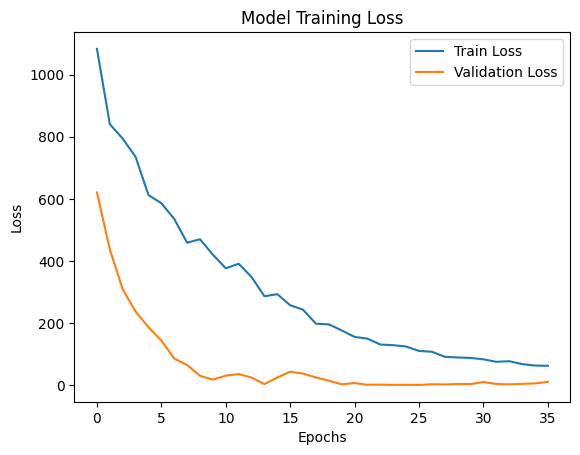

In [ ]:
history = model.fit(
    X_train, y_train,
    validation_split=validation_split,
    epochs=epochs,
    batch_size=batch_size,
    verbose=verbose,
    callbacks=[early_stopping]
)

# Evaluate Model
_, train_acc = model.evaluate(X_train, y_train, verbose=0)
_, test_acc = model.evaluate(X_test, y_test, verbose=0)
print('Train Accuracy: %.3f, Test Accuracy: %.3f' % (train_acc, test_acc))

# Plot Training History
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Training Loss')
plt.show()

In [ ]:
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


In [ ]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(classification_report(y_test, y_pred))

Accuracy: 0.6280
Precision: 0.5200
Recall: 0.1405
F1 Score: 0.2213
              precision    recall  f1-score   support

           0       0.64      0.92      0.76       307
           1       0.52      0.14      0.22       185

    accuracy                           0.63       492
   macro avg       0.58      0.53      0.49       492
weighted avg       0.60      0.63      0.55       492



In [ ]:
#Model Definition by member 2
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.callbacks import EarlyStopping

def model_theodora():
    model = tf.keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=l2(0.0001)),
        layers.Dropout(0.3),
        layers.Dense(32, activation='relu', kernel_regularizer=l2(0.0001)),
        layers.Dropout(0.3),
        layers.Dense(16, activation='relu', kernel_regularizer=l2(0.0001)),
        layers.Dropout(0.3),
        #layers.Dense(8,activation='relu',kernel_regularizer=regularizers.l1(0.0001)),
        layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Create the model
theodora_model = model_theodora()

# Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Train: 0.602, Test: 0.624


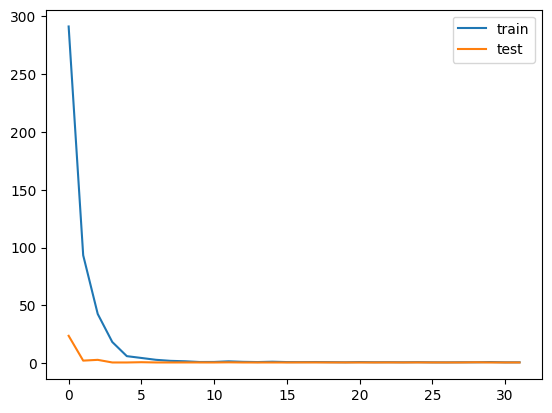

In [ ]:
# Fit the model
history = theodora_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, verbose=0, callbacks=[early_stopping])

# Evaluate the model
_, train_acc = theodora_model.evaluate(X_train, y_train, verbose=0)
_, test_acc = theodora_model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

# Plot training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [ ]:
y_pred_prob = theodora_model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(classification_report(y_test, y_pred))



16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Accuracy: 0.6240
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
              precision    recall  f1-score   support

           0       0.62      1.00      0.77       307
           1       0.00      0.00      0.00       185

    accuracy                           0.62       492
   macro avg       0.31      0.50      0.38       492
weighted avg       0.39      0.62      0.48       492



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

In [ ]:
#Model Definition by member 3




Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 64)                  │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,753 (10.75 KB)

 Trainable params: 2,753 (10.75 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Iradukunda ruth
import tensorflow as tf
from tensorflow.keras import layers, regularizers, callbacks
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.layers import Input

def ruth_model():
    model = tf.keras.Sequential([
        Input(shape=(X_train.shape[1],)),
        layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
        layers.Dropout(0.3),
        layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
        layers.Dropout(0.3),
        layers.Dense(1, activation='sigmoid')
    ])

    #  Compiling model
    model.compile(optimizer='RMSprop', loss="binary_crossentropy", metrics=["accuracy"])

    return model

# Model summary
model = ruth_model()
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_30 (Dense)                     │ (None, 64)                  │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_18 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_19 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,753 (10.75 KB)

 Trainable params: 2,753 (10.75 KB)

 Non-trainable params: 0 (0.00 B)

Train: 0.602, Test: 0.624


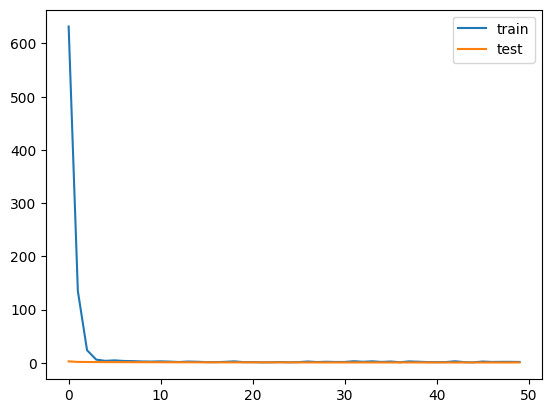

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Accuracy: 0.376
Precision: 0.376
Recall: 1.000
F1 Score: 0.547


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# fit model
es=EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=4000, verbose=0, callbacks=[es])


# Evaluate the model
_, train_acc = model.evaluate(X_train, y_train, verbose=0)
_, test_acc = model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))


# plot training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score # necessary library for metrics

y_predict = (model.predict(X_test) > 0.5).astype("int32")

# Calculate each metric
accuracy = accuracy_score(y_test, y_predict)
precision = precision_score(y_test, y_predict)
recall = recall_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)


print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Accuracy: 0.624
Precision: 0.000
Recall: 0.000
F1 Score: 0.000


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Start the training Process

In [ ]:

#Reuse this codeif necessary
#fit model
history = model.fit(X, y, validation_data=(testX, testy), epochs=4000, verbose=0, callbacks=[es])
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot training history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()